In [134]:
import pandas as pd
pd.options.display.max_rows = 50
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

# api https://live.euronext.com/fr/intraday_chart/getDetailedQuoteAjax/FR0000130452-XPAR/full

In [135]:
df= pd.read_excel("dataParis.xlsx")
df.drop([0,1,2], inplace=True)
df.reset_index(drop=True, inplace=True)


In [200]:
def getMarketCap(ISIN):
    url = f"https://live.euronext.com/fr/intraday_chart/getDetailedQuoteAjax/{ISIN}-XPAR/full"
    response = requests.get(url)
    if(response.ok):
        soup = BeautifulSoup(response.text)
        try:
            capitalization = soup.find("tbody").findAll('tr')[11].find(class_="font-weight-medium").text
            return capitalization
        except IndexError:
            return 0

def convertToInt(ISIN):
    if(type(ISIN)==str):
        if("Md" in ISIN):
            return (float(ISIN.replace("Md","").replace(",",".")))
        if("Md" in ISIN):
            return 0

def getMarketCapInt(ISIN):
    return convertToInt(getMarketCap(ISIN))
        





In [201]:
def addMarketCap():
    for i, row in df.iterrows():
        if(i>106):
            print(row['ISIN'])
            df.at[i,'MarketCap'] = getMarketCapInt(row['ISIN'])
            print(i)
    df.sort_values(by='MarketCap', ascending=False,ignore_index=True, inplace=True)


In [231]:
def removeNonFrenchCompany():
    index=[]
    for i, row in df.iterrows():
        if(not('FR' in df.loc[i]['ISIN'])):
            index.append(i)
    df.drop(index, inplace=True)
    df.reset_index(drop=True, inplace=True)
removeNonFrenchCompany()

In [232]:
df

,Name,ISIN,Symbol,Market,Trading Currency,Open,High,Low,Last,Last Date/Time,Time Zone,Volume,Turnover,MarketCap
0,LVMH,FR0000121014,MC,Euronext Paris,EUR,697.00,713.00,645.00,692.00,2021-11-26 17:35:00,CET,921585,643934455.90,349.292
1,L'OREAL,FR0000120321,OR,Euronext Paris,EUR,403.05,409.15,400.50,402.30,2021-11-26 17:39:00,CET,690282,278548547.80,224.351
2,HERMES INTL,FR0000052292,RMS,Euronext Paris,EUR,1590.00,1628.50,1582.00,1604.00,2021-11-26 17:30:00,CET,106885,171915844.00,169.333
3,CHRISTIAN DIOR,FR0000130403,CDI,Euronext Paris,EUR,686.00,699.00,672.00,675.00,2021-11-26 17:35:00,CET,12702,8700262.50,121.843
4,SANOFI,FR0000120578,SAN,Euronext Paris,EUR,85.27,86.29,84.28,85.01,2021-11-26 17:35:00,CET,3118500,265868606.65,107.412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,ACCOR NV21,FR00140015P7,ACNV,Euronext Paris,EUR,-,-,-,-,-,CET,-,-,0.000
130,ROBERTET CDV 87,FR0000045619,CBR,Euronext Paris,EUR,194.00,194.00,194.00,194.00,2021-04-16 11:30:00,CET,1,194.00,NaN
131,ROBERTET CI,FR0000045601,CBE,Euronext Paris,EUR,942.00,942.00,942.00,942.00,2021-11-26 16:30:00,CET,21,19782.00,NaN
132,SOLUTIONS 30 SE,FR0013379484,S30,Euronext Paris,EUR,6.55,6.66,6.28,6.515,2021-11-26 17:37:00,CET,1674939,10875511.39,NaN


In [391]:
def pieByPercent(i,size=150):
    plt.rcParams['figure.dpi'] = size
    plt.rcParams['savefig.dpi'] = size
    name = df['Name'].to_list()
    marketCap = df['MarketCap'].to_list()
    plt.pie(marketCap[0:i], labels =name[0:i], wedgeprops={'edgecolor':'black', 'linewidth': 0.5}, shadow=True, autopct='%1.1f%%', textprops={'fontsize': 1500/size})
    plt.title(f"Largest {i} french companies listed on Euronext Paris")
    plt.savefig(f"piechart{i}")



    

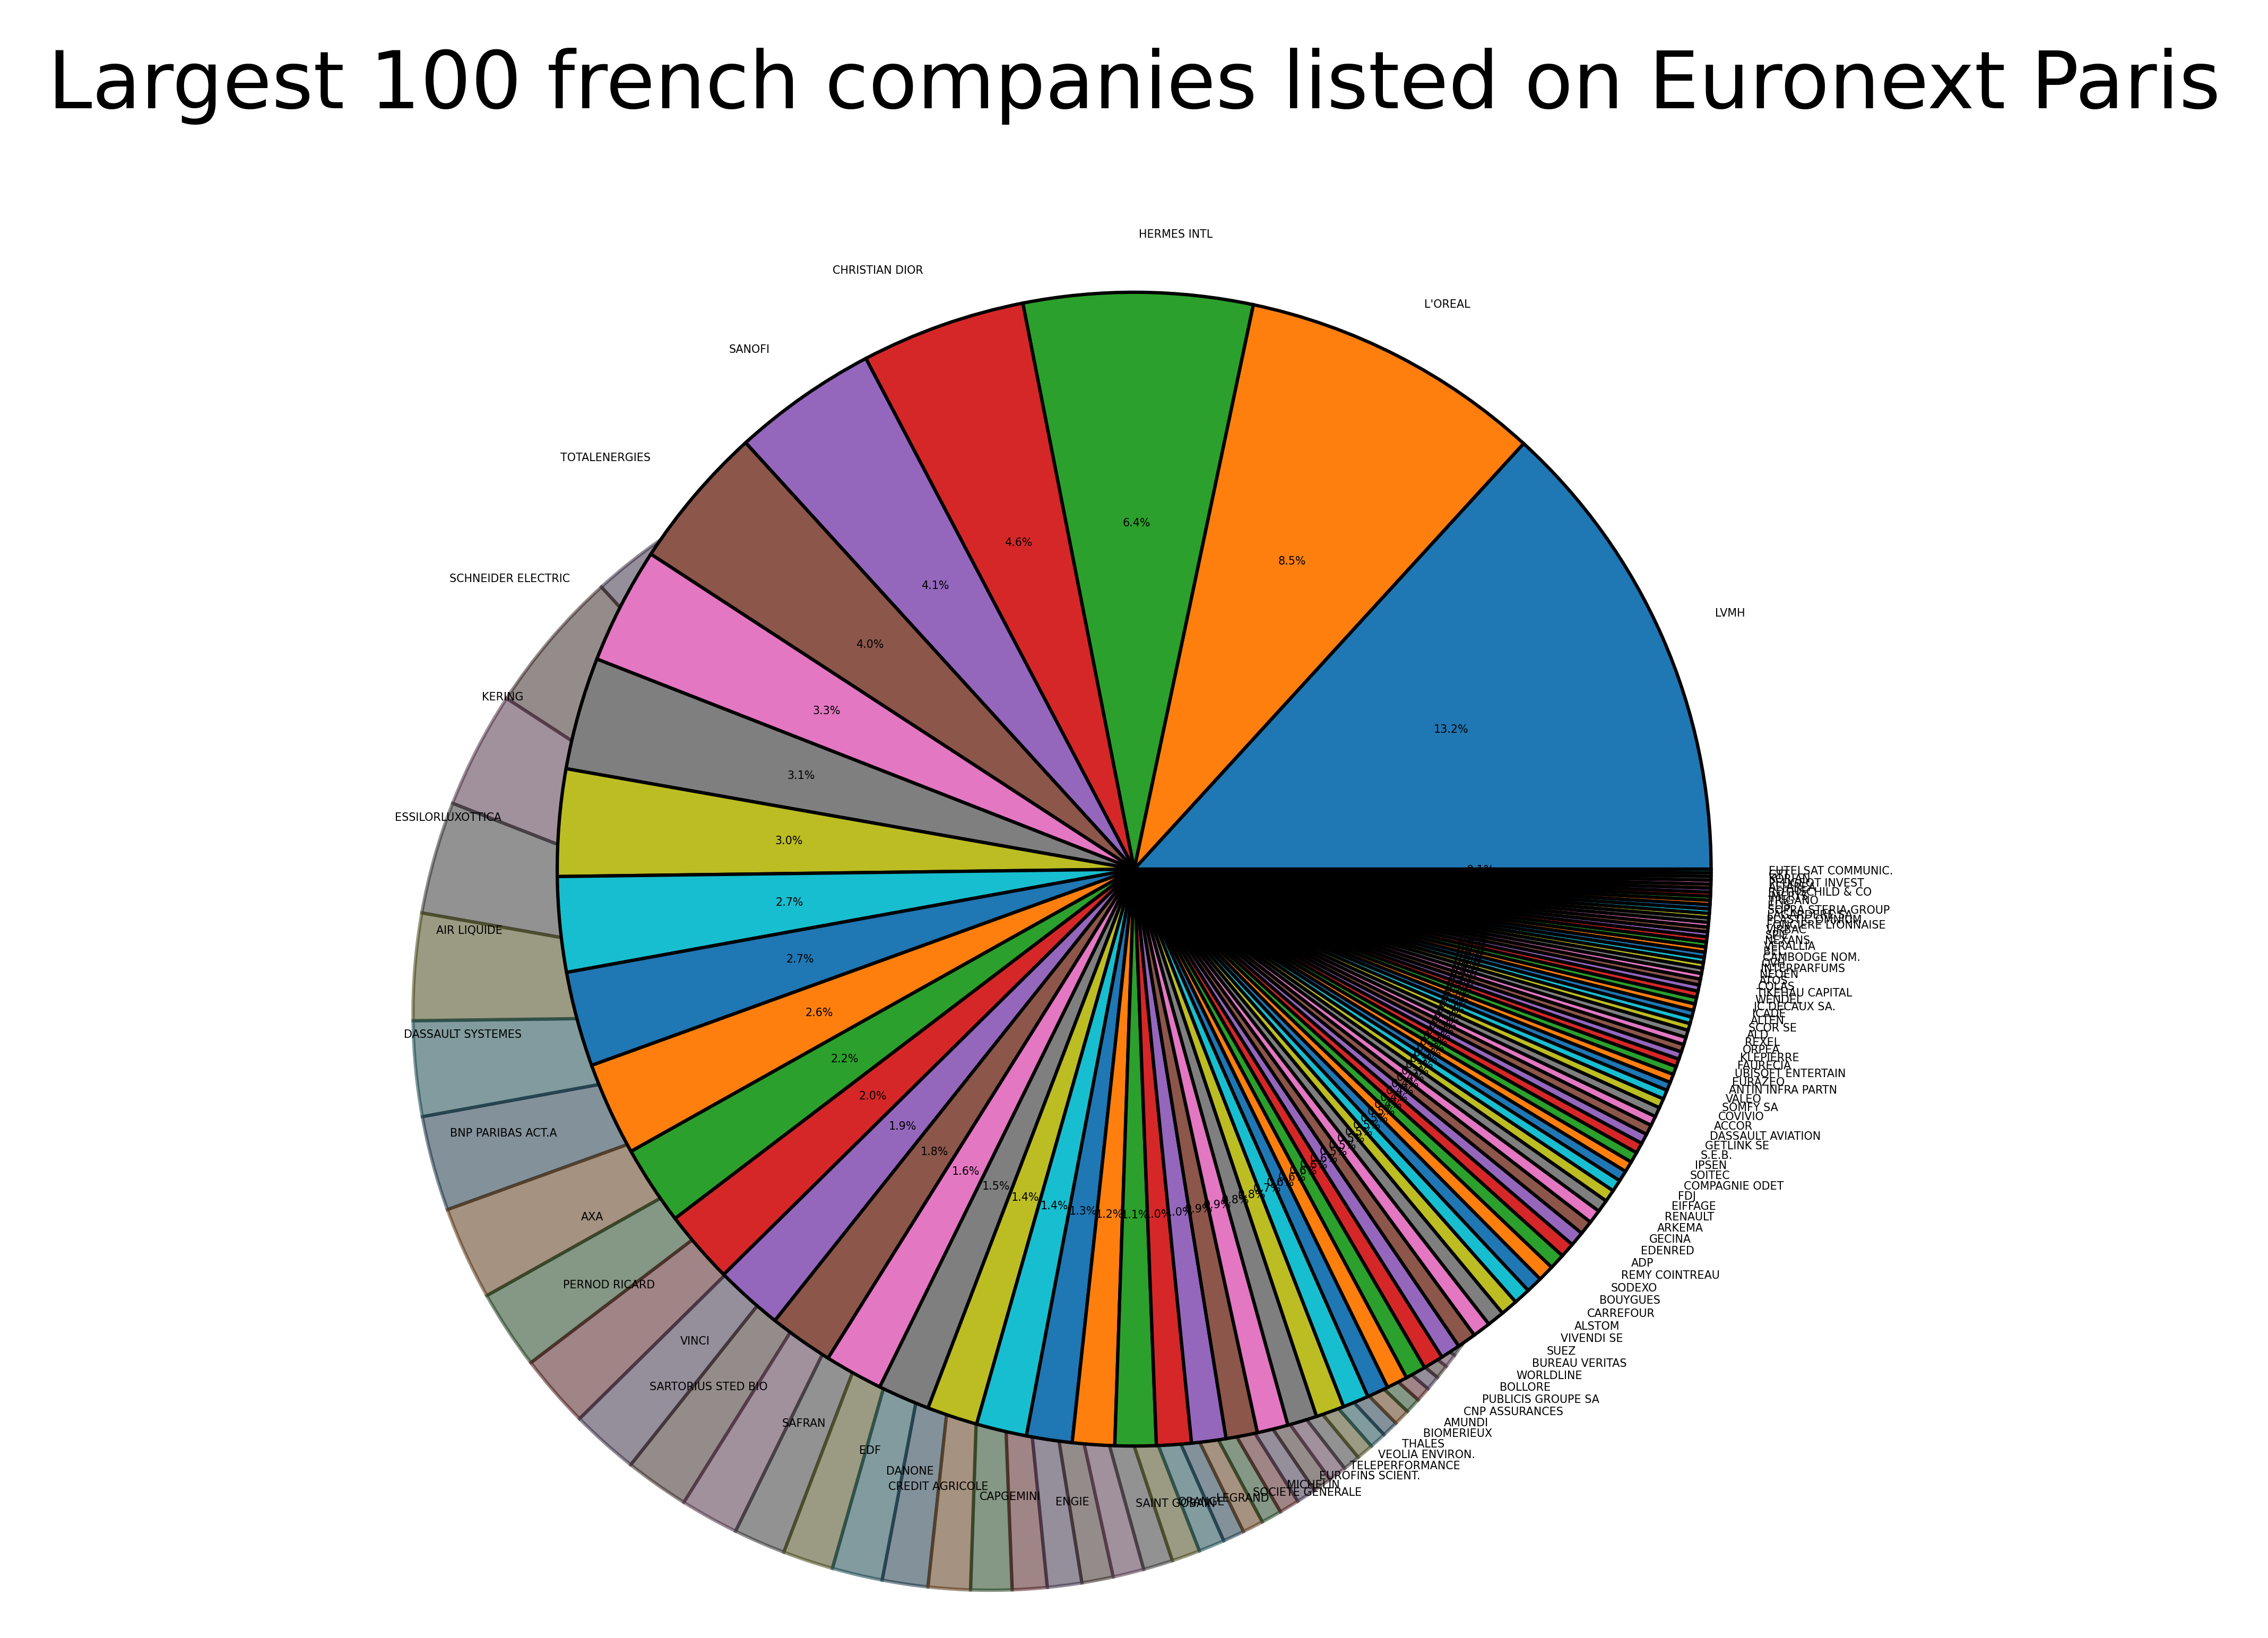

In [392]:
pieByPercent(100,900)

ModuleNotFoundError: No module named 'iterables'